# Trajectory Prediction of Moving Objects using a VAE-LSTM model Approach
_for the EIT conference in Honghzu, China, 2024_

    Lin, Shuyu, et al. "Anomaly detection for time series using vae-lstm hybrid model." ICASSP 2020-2020 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP). Ieee, 2020.


- Trainingsdaten generieren mit großen Kreisen (Rauschen?, Einspeisemuster?)
- Netzwerk bauen (LSTM+VAE)
- Überlegen, wie eine sinnvolle Auswertung vorgenommen werden kann

In [35]:
import os

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from support import get_info, get_permele_diff, get_permidx_diff, rphi_to_xy, show_mesh_thorax

# to save the plots, set this to true
save_imgs = True
n_el = 16
r_min = 0.1
r_max = 0.4
h0 = 0.025
dist_exc = 8
step_meas = 4

load_path = f"../data_thorax/{h0=}_{n_el=}_{r_min=}_{r_max=}_{dist_exc=}_{step_meas=}/"

if os.path.isdir(load_path):
    print("This directory exists...continue")
else:
    print("You have to generate the data...")

This directory exists...continue


In [37]:
for ele in os.listdir("../data_thorax/"):
    print(ele, len(os.listdir("../data_thorax/" + ele + "/")))

h0=0.025_n_el=32_r_min=0.1_r_max=0.4_dist_exc=16_step_meas=8 4532
h0=0.025_n_el=16_r_min=0.1_r_max=0.4_dist_exc=8_step_meas=4 10000


## Evaluate differences

Between the simulated data from time $t_0$ and $t_1$ should be a recognizable difference. Let's evaluate how big this is. This difference is needed to make it possible to generalize the features of the LSTM and the VAE.

In [38]:
tmp = np.load(load_path + "sample_000250.npz", allow_pickle=True)

In [39]:
get_info(tmp)

anomaly : [PyEITAnomaly_Circle(center=array([-0.45,  0.  ]), perm=100, r=0.4026751837880186)
 PyEITAnomaly_Circle(center=array([0.5, 0. ]), perm=100, r=0.4026751837880186)]
n_el : 16
h0 : 0.025


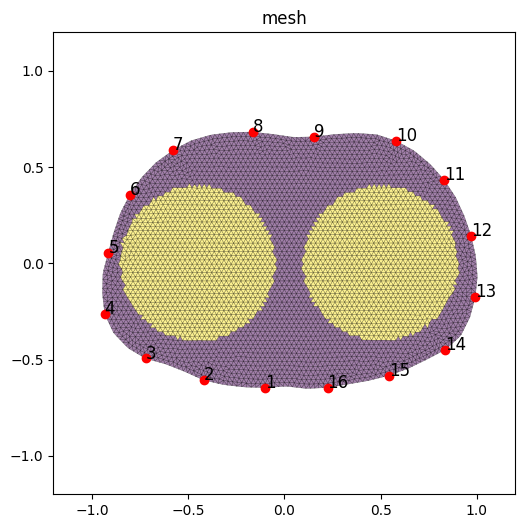

In [14]:
show_mesh_thorax(tmp, return_mesh=False)

In [32]:
tmp_1 = np.load(load_path + "sample_000000.npz", allow_pickle=True)
tmp_2 = np.load(load_path + "sample_000100.npz", allow_pickle=True)

In [33]:
get_info(tmp_1)
get_info(tmp_2)

anomaly : [PyEITAnomaly_Circle(center=array([-0.45,  0.  ]), perm=100, r=0.10023516589777949)
 PyEITAnomaly_Circle(center=array([0.5, 0. ]), perm=100, r=0.10023516589777949)]
n_el : 16
h0 : 0.025
anomaly : [PyEITAnomaly_Circle(center=array([-0.45,  0.  ]), perm=100, r=0.10245087931236999)
 PyEITAnomaly_Circle(center=array([0.5, 0. ]), perm=100, r=0.10245087931236999)]
n_el : 16
h0 : 0.025


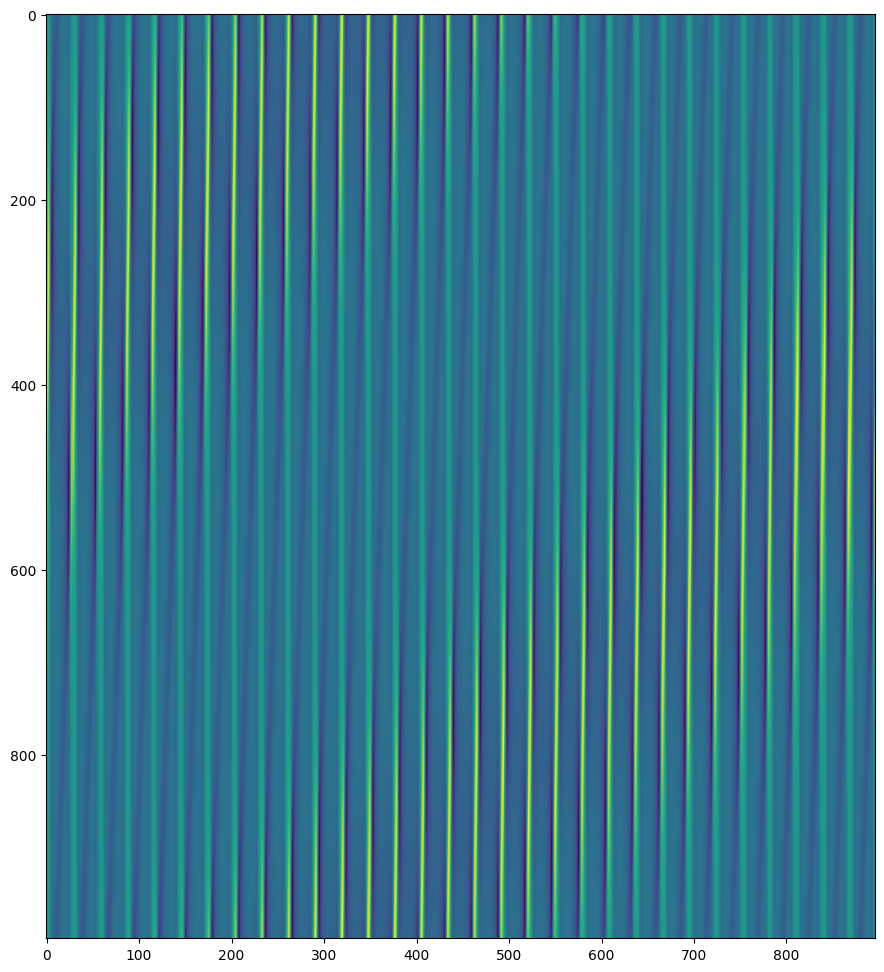

In [15]:
plt.figure(figsize=(20, 12))
plt.imshow((v_data[:, :] - v_empty) ** (1 / 1))